# <center>  COVID-19 - Analysis, Visualization </center>


### Group members:
- Khwla Alsafri
- Ahmad Fatani
- Wafa Alshehri 
- Hessah Alkhattabi 
- Doaa Alsenani
----

## Introduction

- This project was accomplished in hackathon covid-19  in General Assembly with the Misk Academy. This data was collected from the World Health Organization.

### Problem Statement

In this hackathon, we will use the World Health Organization Dataset.


We will analyze and visualizes :
- Which country has the highest coronavirus death in total?
- Which country has the highest coronavirus Confirmed in total?
- Which countries have confirmed cases in Coronavirus by day?
- Which countries have confirmed cases in Coronavirus by month?

## Importing packages


In [1]:
# !pip install dash dash-renderer dash-core-components dash-html-components plotly --upgrade

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True)

# Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Loading the covid_19 Dataset

In [4]:
covid_19 = pd.read_csv('./covid_19_clean_complete.csv')

## Exploring the Data

In [5]:
covid_19.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0,0


In [6]:
covid_19.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
22789,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/17/20,1,0,0
22790,NaN,South Sudan,6.877000,31.307000,4/17/20,4,0,0
22791,NaN,Western Sahara,24.215500,-12.885800,4/17/20,6,0,0
22792,NaN,Sao Tome and Principe,0.186360,6.613081,4/17/20,4,0,0
22793,NaN,Yemen,15.552727,48.516388,4/17/20,1,0,0


In [7]:
covid_19.shape

(22794, 8)

In [8]:
covid_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22794 entries, 0 to 22793
Data columns (total 8 columns):
Province/State    6960 non-null object
Country/Region    22794 non-null object
Lat               22794 non-null float64
Long              22794 non-null float64
Date              22794 non-null object
Confirmed         22794 non-null int64
Deaths            22794 non-null int64
Recovered         22794 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.4+ MB


### Check Missing Values

In [9]:
missing= covid_19.isnull().sum().sort_values(ascending=False)
percentage = (covid_19.isnull().sum()/ covid_19.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, percentage], axis=1, keys=['Missing', '%'])
missing_data.head(8)

,Missing,%
Province/State,15834,0.694656
Recovered,0,0.000000
Deaths,0,0.000000
Confirmed,0,0.000000
Date,0,0.000000
Long,0,0.000000
Lat,0,0.000000
Country/Region,0,0.000000


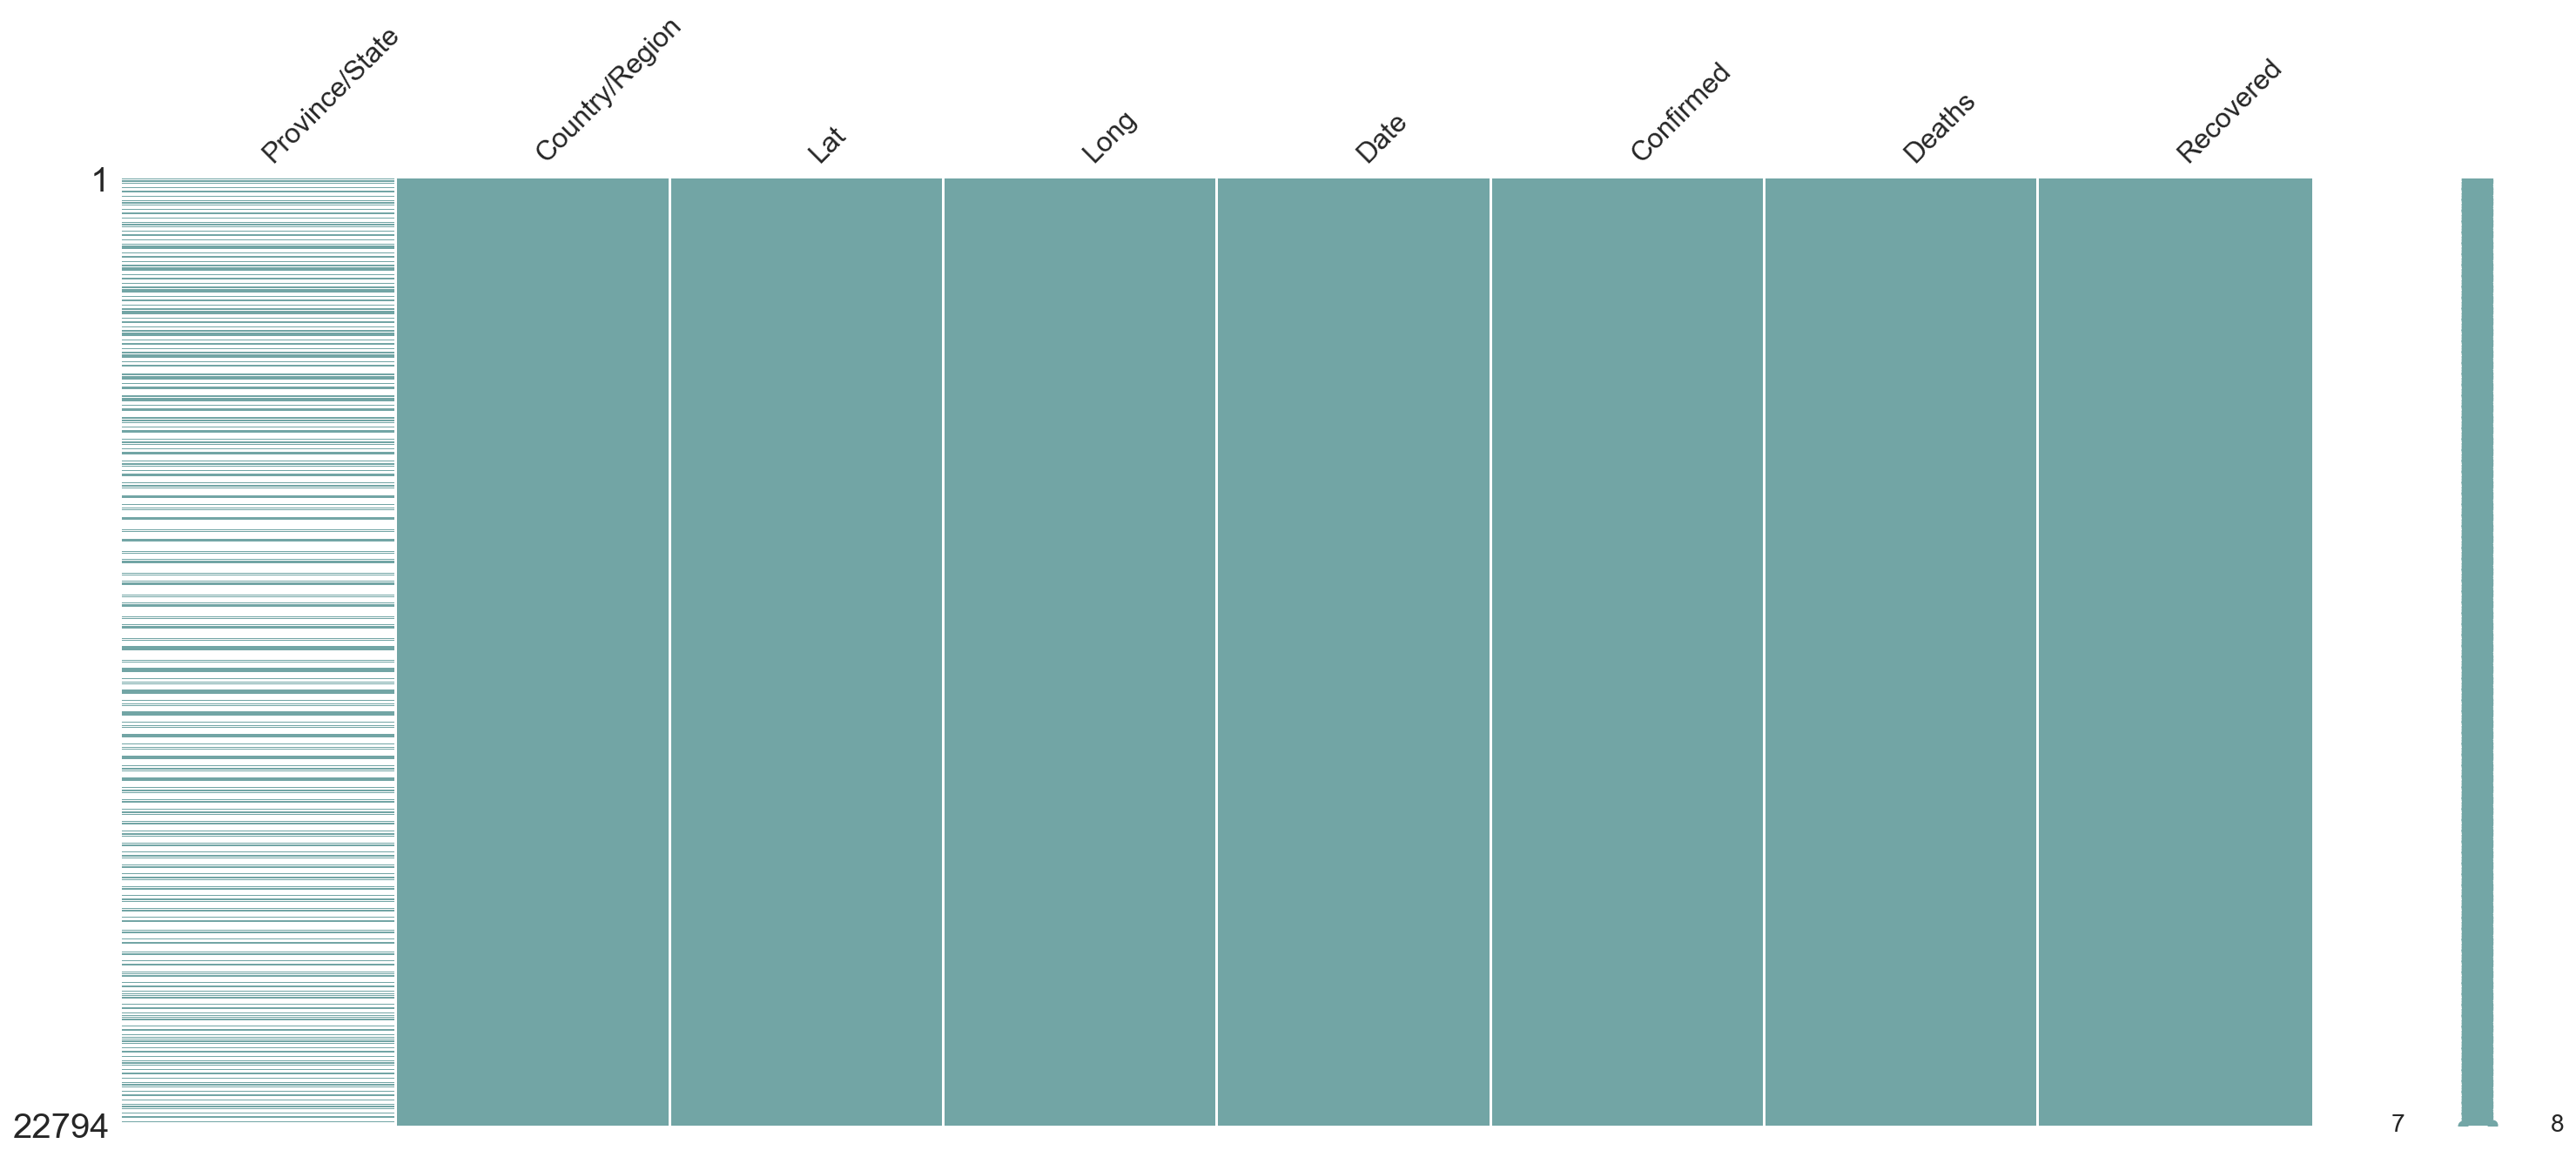

In [10]:
# visualize the location of missing values
msno.matrix(covid_19,color=(0.45, 0.65, 0.65))

###  Check Duplicated Values

In [11]:
duplicateRowsDF = covid_19[covid_19.duplicated()]

In [12]:
duplicateRowsDF

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered


<function matplotlib.pyplot.show(*args, **kw)>

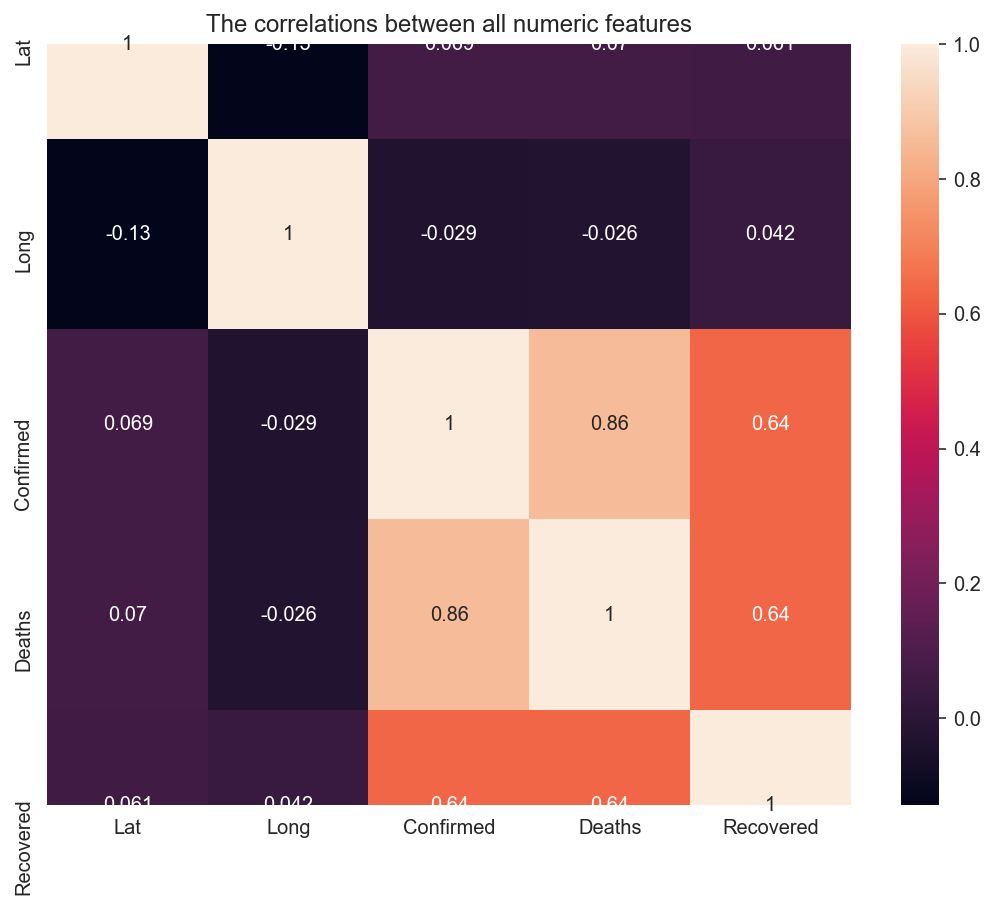

In [13]:
fig=plt.figure(figsize=(9,7))
ax = fig.gca()
sns.heatmap(covid_19.corr(), annot=True,ax=ax)
ax.set_title('The correlations between all numeric features')
palette = sns.diverging_palette(80, 110, n=146)
plt.show

## Cleaning Data 

- ## Province/State Feature

In [14]:
covid_19['Province/State'] = covid_19['Province/State'].fillna('no_province/state')

In [15]:
covid_19['Province/State'].unique()

array(['no_province/state', 'Australian Capital Territory',
       'New South Wales', 'Northern Territory', 'Queensland',
       'South Australia', 'Tasmania', 'Victoria', 'Western Australia',
       'Alberta', 'British Columbia', 'Grand Princess', 'Manitoba',
       'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia',
       'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan',
       'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu',
       'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai',
       'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin',
       'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang', 'Faroe Islands',
       'Greenland', 'French Guiana', 'French Polynesia', 'Guadeloupe',
       'Mayotte', 'New Caledonia', 'Reunion', 'Saint Barthelemy',
       'St Martin', 'Martinique', 'Aruba', 

In [16]:
# replace
covid_19['Province/State'] =covid_19['Province/State'].str.replace('(','')
covid_19['Province/State'] =covid_19['Province/State'].str.replace(')','')
covid_19['Province/State'] =covid_19['Province/State'].str.replace(' Malvinas','')

In [17]:
# Not Province/State
display(covid_19[covid_19['Province/State']=='Grand Princess'].head())
display(covid_19[covid_19['Province/State']=='Diamond Princess'].head())

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
37,Grand Princess,Canada,37.6489,-122.6655,1/22/20,0,0,0
299,Grand Princess,Canada,37.6489,-122.6655,1/23/20,0,0,0
561,Grand Princess,Canada,37.6489,-122.6655,1/24/20,0,0,0
823,Grand Princess,Canada,37.6489,-122.6655,1/25/20,0,0,0
1085,Grand Princess,Canada,37.6489,-122.6655,1/26/20,0,0,0


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
231,Diamond Princess,Canada,0.0,0.0,1/22/20,0,0,0
493,Diamond Princess,Canada,0.0,0.0,1/23/20,0,0,0
755,Diamond Princess,Canada,0.0,0.0,1/24/20,0,0,0
1017,Diamond Princess,Canada,0.0,0.0,1/25/20,0,0,0
1279,Diamond Princess,Canada,0.0,0.0,1/26/20,0,0,0


In [18]:
# Drop
covid_19 = covid_19[covid_19['Province/State']!='Grand Princess']
covid_19 = covid_19[covid_19['Province/State']!='Diamond Princess']


- ### Country/Region Feature

In [19]:
covid_19['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [20]:
covid_19['Country/Region'] =covid_19['Country/Region'].str.replace('Kinshasa','')
covid_19['Country/Region'] =covid_19['Country/Region'].str.replace('Brazzaville','')
covid_19['Country/Region'] =covid_19['Country/Region'].str.replace('(','')
covid_19['Country/Region'] =covid_19['Country/Region'].str.replace(')','')

In [21]:
# Not Country/Region
display(covid_19[covid_19['Country/Region']=='Diamond Princess'].head())
display(covid_19[covid_19['Country/Region']=='MS Zaandam'].head())

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
88,no_province/state,Diamond Princess,0.0,0.0,1/22/20,0,0,0
350,no_province/state,Diamond Princess,0.0,0.0,1/23/20,0,0,0
612,no_province/state,Diamond Princess,0.0,0.0,1/24/20,0,0,0
874,no_province/state,Diamond Princess,0.0,0.0,1/25/20,0,0,0
1136,no_province/state,Diamond Princess,0.0,0.0,1/26/20,0,0,0


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
251,no_province/state,MS Zaandam,0.0,0.0,1/22/20,0,0,0
513,no_province/state,MS Zaandam,0.0,0.0,1/23/20,0,0,0
775,no_province/state,MS Zaandam,0.0,0.0,1/24/20,0,0,0
1037,no_province/state,MS Zaandam,0.0,0.0,1/25/20,0,0,0
1299,no_province/state,MS Zaandam,0.0,0.0,1/26/20,0,0,0


In [22]:
# Drop
covid_19 =covid_19[covid_19['Country/Region']!='Diamond Princess']
covid_19 =covid_19[covid_19['Country/Region']!='MS Zaandam']

- ### Making Lowercase

In [23]:
covid_19['Province/State'] = covid_19['Province/State'].apply(lambda x:x.lower())
covid_19['Country/Region'] =covid_19['Country/Region'].apply(lambda x:x.lower())

- ### Date Feature

In [24]:
covid_19['year'] = pd.DatetimeIndex(covid_19['Date']).year

In [25]:
covid_19['month'] = pd.DatetimeIndex(covid_19['Date']).month

In [26]:
covid_19['day'] = pd.DatetimeIndex(covid_19['Date']).day

In [27]:
#Drop
del covid_19['Date']

- ### Rename Columns

In [28]:
covid_19.rename(columns={'Country/Region':'country',
                         'Lat':'latitude',
                         'Long':'longitude',
                         'Confirmed':'confirmed',
                         'Deaths':'deaths',
                         'Recovered':'recovered',
                          'Province/State':'province/state'
                          },inplace=True)

- ### Reset Index 

In [29]:
covid_19.reset_index(drop=True, inplace=True)

###  Save the Data as CVS File After Cleaning 

In [30]:
covid_19.to_csv('./covid_19_datasets.csv') 

In [31]:
display(covid_19.head())
display(covid_19.shape)

,province/state,country,latitude,longitude,confirmed,deaths,recovered,year,month,day
0,no_province/state,afghanistan,33.0000,65.0000,0,0,0,2020,1,22
1,no_province/state,albania,41.1533,20.1683,0,0,0,2020,1,22
2,no_province/state,algeria,28.0339,1.6596,0,0,0,2020,1,22
3,no_province/state,andorra,42.5063,1.5218,0,0,0,2020,1,22
4,no_province/state,angola,-11.2027,17.8739,0,0,0,2020,1,22


(22446, 10)

- ### China outlier

In [32]:
china_country = covid_19[covid_19['country']=='china']

In [33]:
no_china = covid_19[covid_19['country']!='china']

In [34]:
no_china.reset_index(drop=True, inplace=True)

###  Visualization

In [35]:
china_full_groupby=china_country.groupby(['country', 'province/state' ])['confirmed', 'deaths', 'recovered'].sum().reset_index()
china_full_groupby.style.background_gradient(cmap='nipy_spectral_r')

,country,province/state,confirmed,deaths,recovered
0,china,anhui,72406,401,56289
1,china,beijing,35538,482,22137
2,china,chongqing,43130,407,32217
3,china,fujian,23540,58,17022
4,china,gansu,8728,139,6640
5,china,guangdong,104887,465,76177
6,china,guangxi,18702,134,13469
7,china,guizhou,10495,133,8028
8,china,hainan,12444,387,9451
9,china,hebei,22882,394,18221


In [36]:
# no_china_full_groupby
no_china_full_groupby= no_china.groupby(['country', 'province/state' ])['confirmed', 'deaths', 'recovered'].sum().reset_index()
no_china_full_groupby.style.background_gradient(cmap='nipy_spectral_r')

,country,province/state,confirmed,deaths,recovered
0,afghanistan,no_province/state,9974,293,537
1,albania,no_province/state,9123,460,3129
2,algeria,no_province/state,32931,4172,6830
3,andorra,no_province/state,12415,452,1355
4,angola,no_province/state,319,40,50
5,antigua and barbuda,no_province/state,370,23,12
6,argentina,no_province/state,37835,1390,7840
7,armenia,no_province/state,19643,201,2865
8,australia,australian capital territory,2244,36,804
9,australia,new south wales,61646,455,1663


### Top 10 Countries with most no. of reported cases

- #### confirmed

In [37]:
#with china
confirmed_groupby = china_full_groupby[['province/state', 'confirmed']]
confirmed_groupby = confirmed_groupby.sort_values(by='confirmed', ascending=False)
confirmed_groupby = confirmed_groupby.reset_index(drop=True)
confirmed_groupby.head(10).style.background_gradient(cmap = 'nipy_spectral_r')

,province/state,confirmed
0,hubei,4591774
1,guangdong,104887
2,henan,93705
3,zhejiang,92697
4,hunan,75722
5,anhui,72406
6,jiangxi,68601
7,shandong,53061
8,jiangsu,46474
9,chongqing,43130


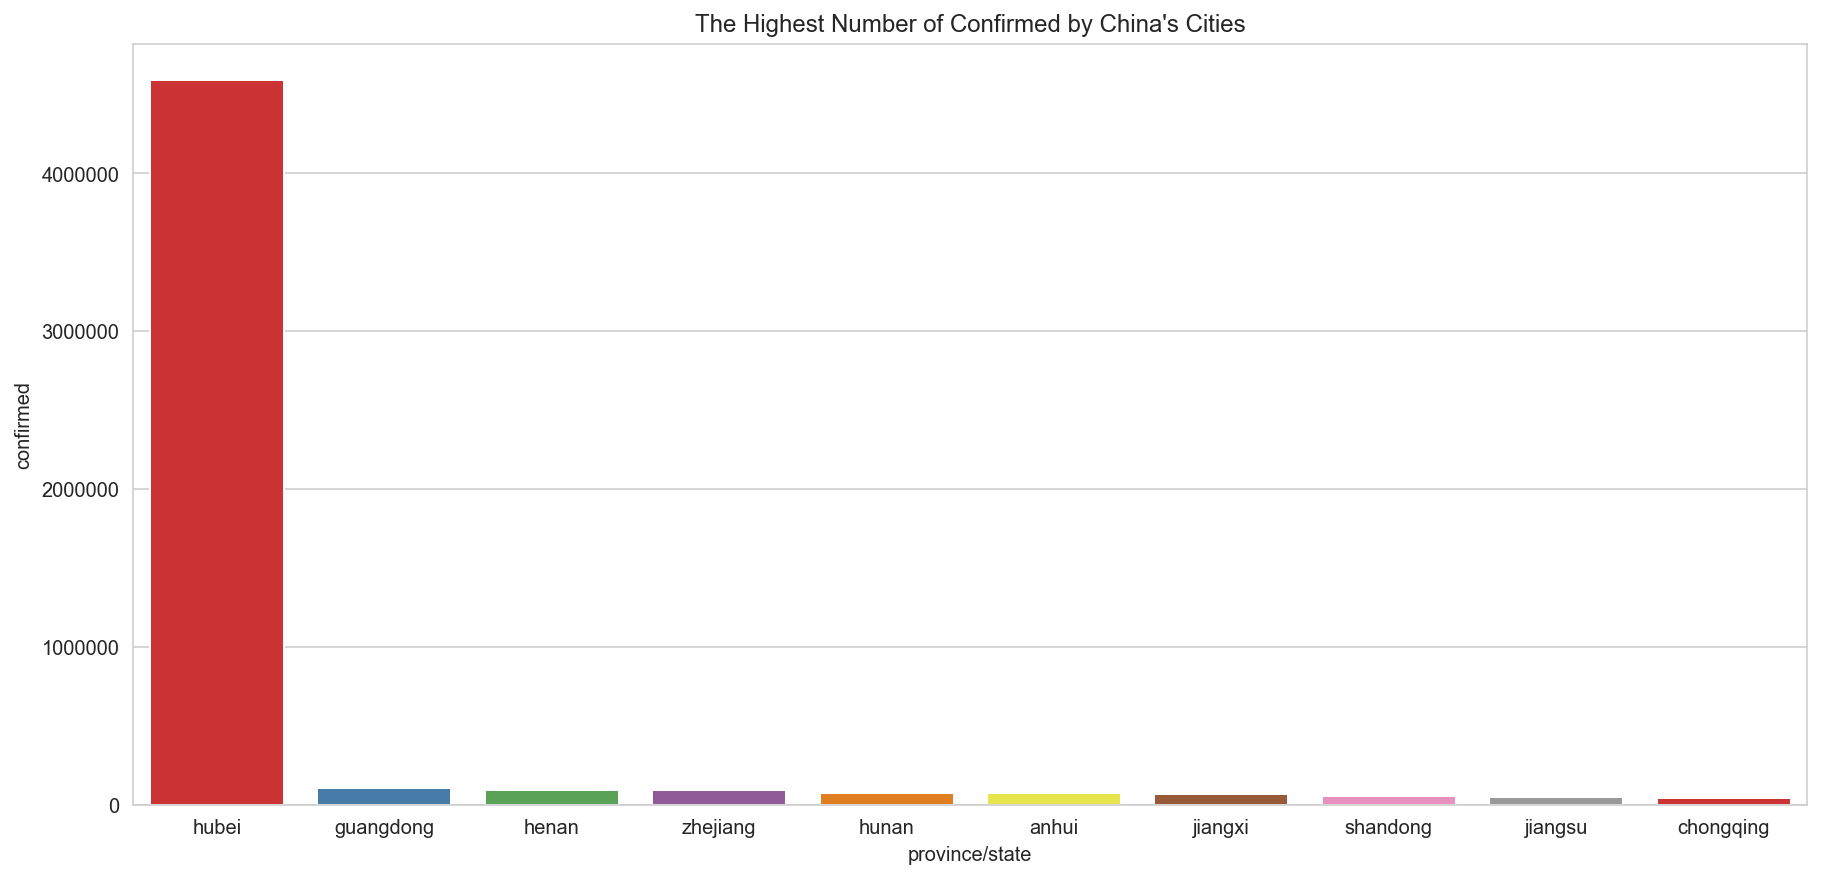

In [38]:
plt.figure(figsize = (15, 7))
plt.title ("The Highest Number of Confirmed by China's Cities")
sns.barplot(x = 'province/state', y = 'confirmed', data = confirmed_groupby.head(10), palette = 'Set1')
plt.show()

In [39]:
#without china
no_china_confirmed_groupby = no_china_full_groupby[['country', 'confirmed']]
no_china_confirmed_groupby= no_china_confirmed_groupby.sort_values(by='confirmed', ascending=False)
no_china_confirmed_groupby = no_china_confirmed_groupby.reset_index(drop=True)
no_china_confirmed_groupby.head(10).style.background_gradient(cmap='nipy_spectral_r')

,country,confirmed
0,us,8889762
1,italy,3646238
2,spain,3300154
3,germany,2531524
4,france,2033148
5,iran,1638637
6,united kingdom,1317269
7,turkey,813791
8,switzerland,551027
9,belgium,515193


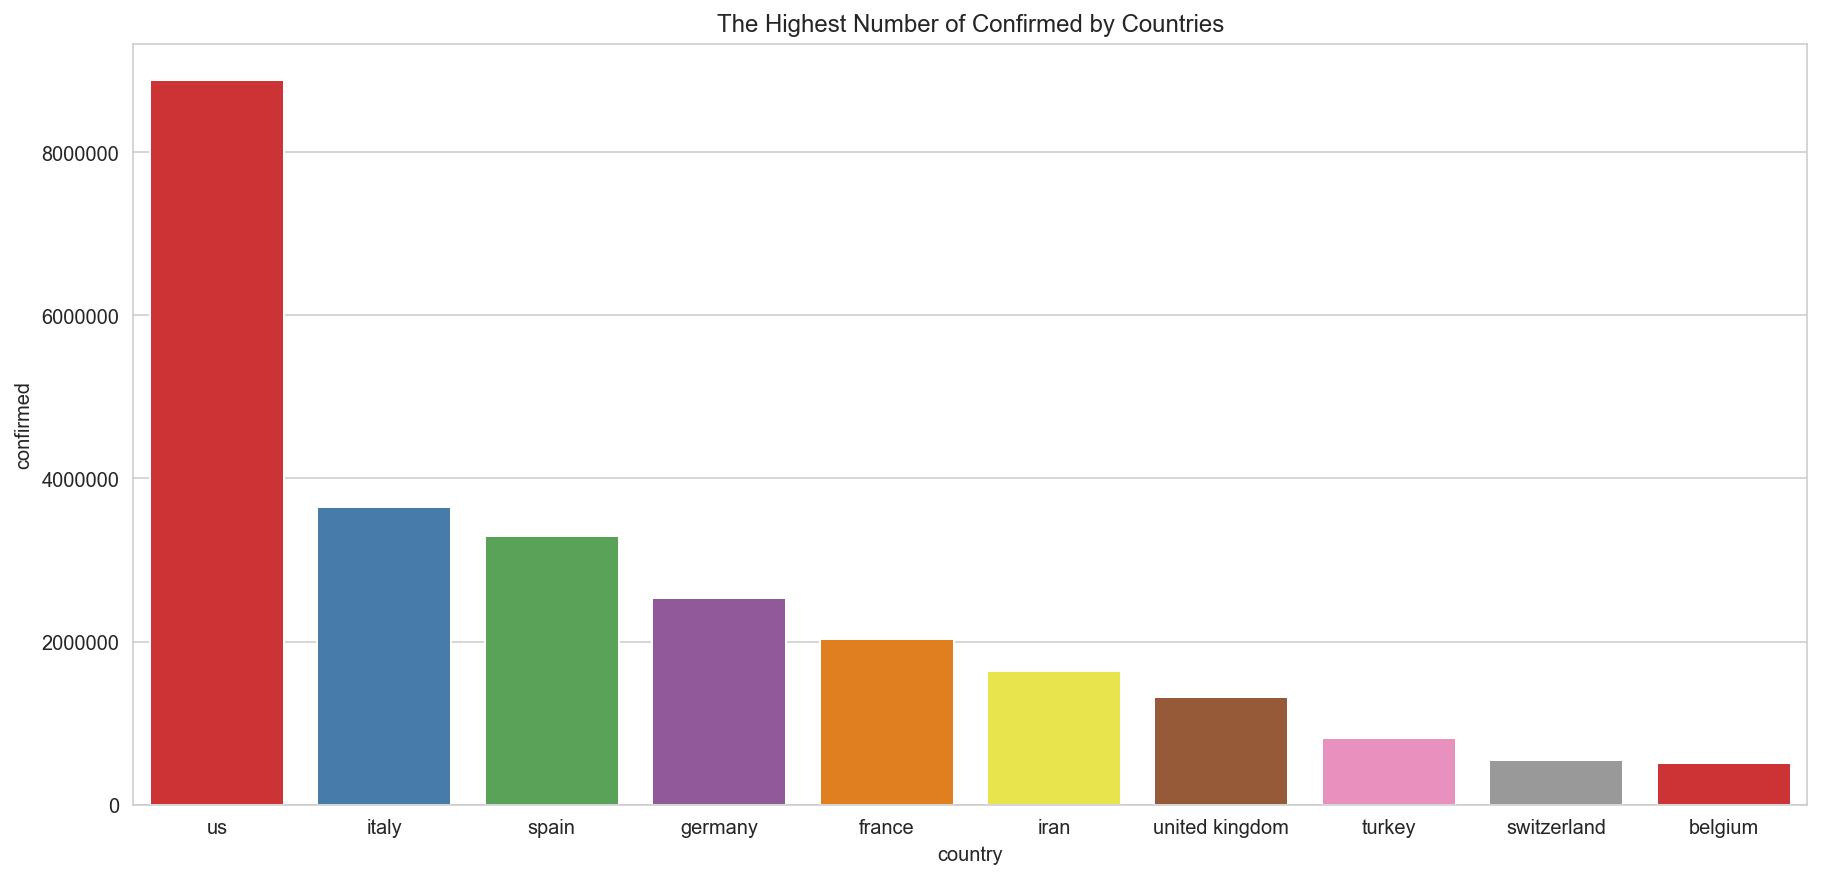

In [40]:
plt.figure(figsize = (15, 7))
plt.title ('The Highest Number of Confirmed by Countries')
sns.barplot(x = 'country', y = 'confirmed', data = no_china_confirmed_groupby.head(10), palette = 'Set1')
plt.show()

- #### Deaths

In [41]:
#with china
death_groupby = china_full_groupby[['province/state', 'deaths']]
death_groupby= death_groupby.sort_values(by='deaths', ascending=False)
death_groupby = death_groupby.reset_index(drop=True)
death_groupby.head(10).style.background_gradient(cmap='nipy_spectral_r')

,province/state,deaths
0,hubei,196220
1,henan,1406
2,heilongjiang,883
3,beijing,482
4,guangdong,465
5,chongqing,407
6,anhui,401
7,shandong,396
8,hebei,394
9,hainan,387


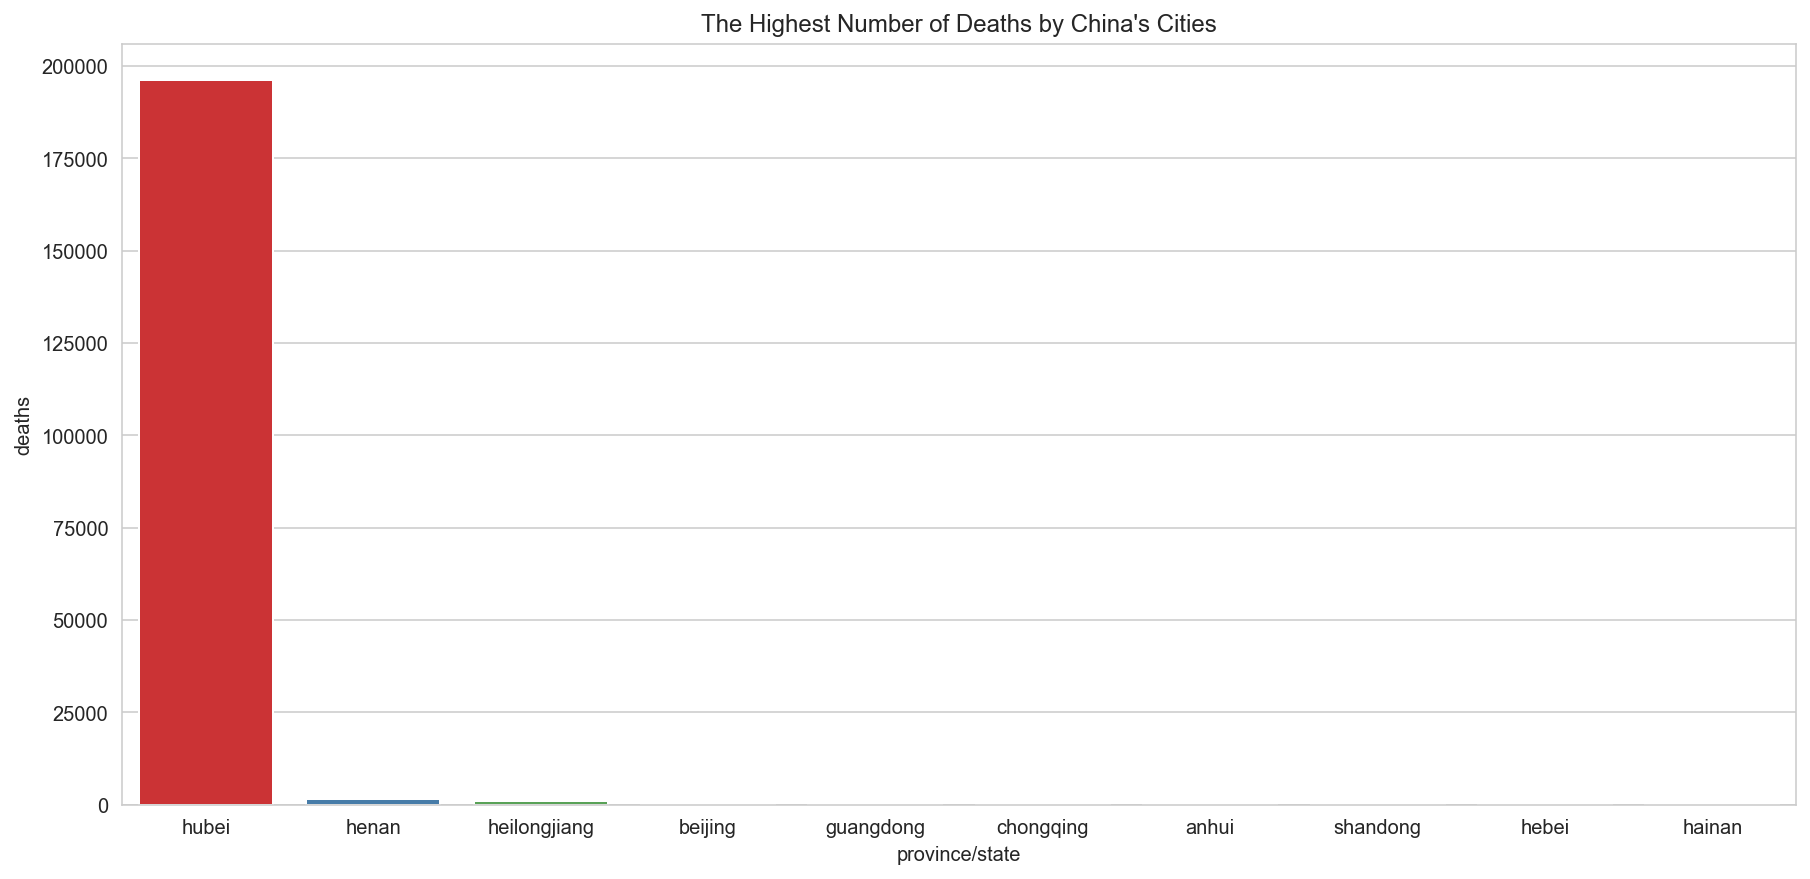

In [42]:
plt.figure(figsize = (15, 7))
plt.title ("The Highest Number of Deaths by China's Cities")
sns.barplot(x = 'province/state', y = 'deaths', data = death_groupby.head(10), palette = 'Set1')
plt.show()

In [43]:
#without china
no_china_death_groupby = no_china_full_groupby[['country', 'deaths']]
no_china_death_groupby= no_china_death_groupby.sort_values(by='deaths', ascending=False)
no_china_death_groupby = no_china_death_groupby.reset_index(drop=True)
no_china_death_groupby.head(10).style.background_gradient(cmap='nipy_spectral_r')

,country,deaths
0,italy,425435
1,us,317112
2,spain,311458
3,france,221447
4,united kingdom,147882
5,iran,103565
6,belgium,49772
7,germany,46209
8,netherlands,45419
9,switzerland,18294


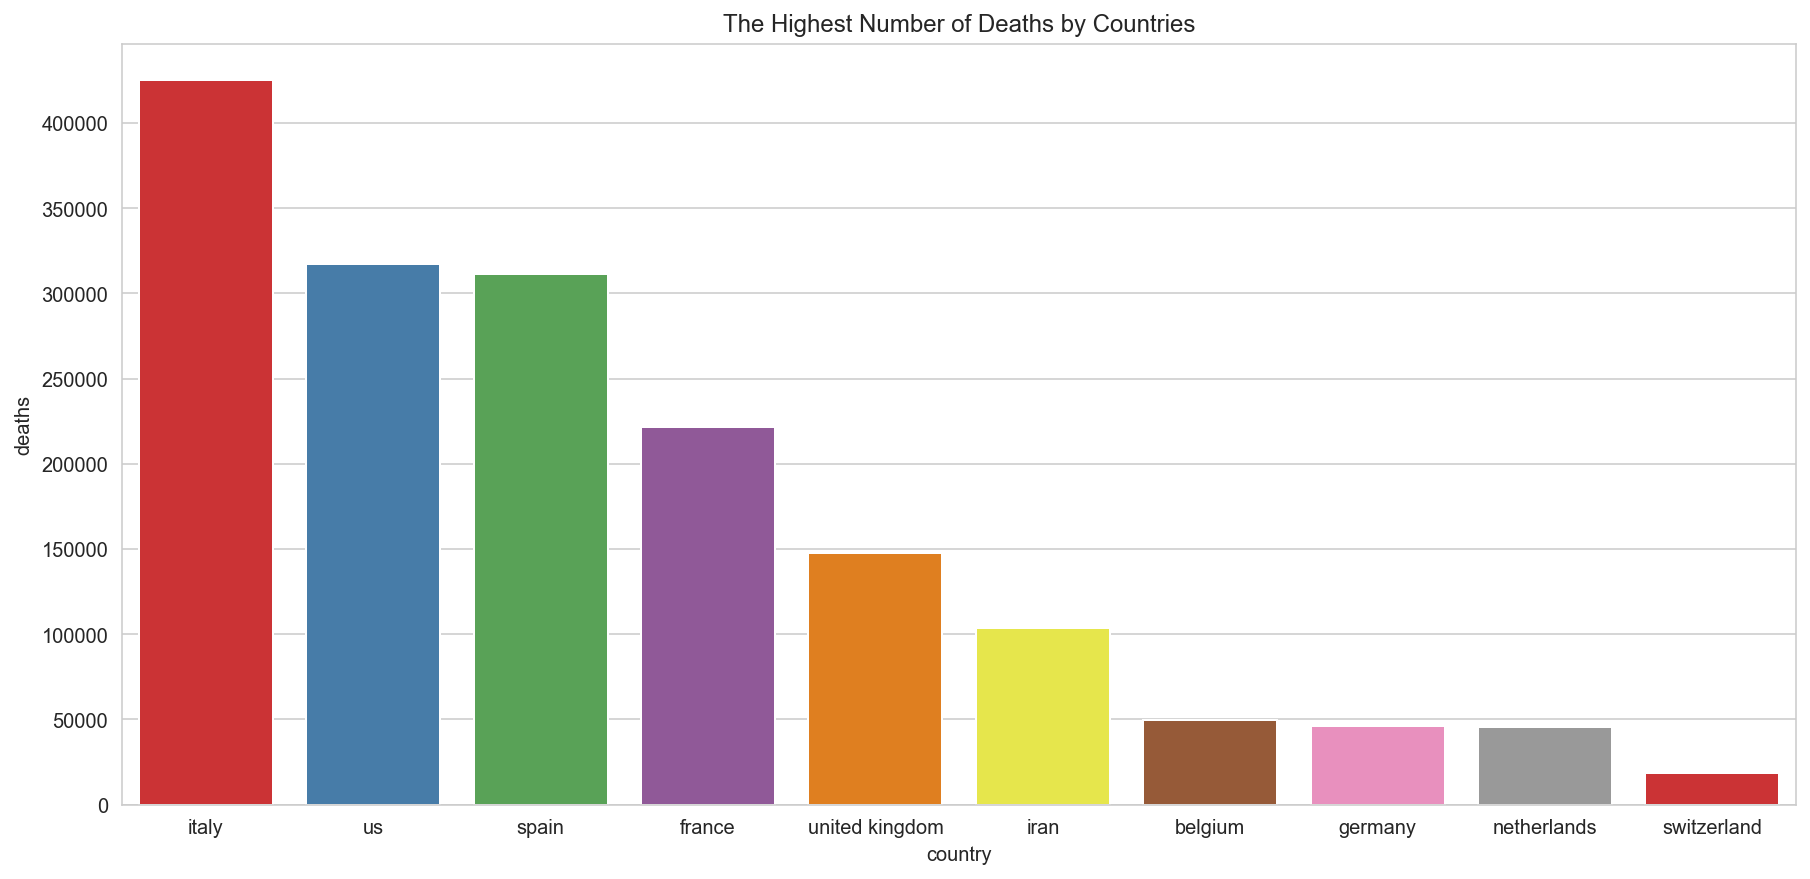

In [44]:
plt.figure(figsize = (15, 7))
plt.title ('The Highest Number of Deaths by Countries')
sns.barplot(x = 'country', y = 'deaths', data = no_china_death_groupby.head(10), palette = 'Set1')
plt.show()

- ### Recovered 

In [45]:
#china
recovered_groupby = china_full_groupby[['province/state', 'recovered']]
recovered_groupby = recovered_groupby.sort_values(by='recovered', ascending=False)
recovered_groupby = recovered_groupby.reset_index(drop=True)
recovered_groupby.head(10).style.background_gradient(cmap='nipy_spectral_r')

,province/state,recovered
0,hubei,2962511
1,guangdong,76177
2,henan,73538
3,zhejiang,70962
4,hunan,59924
5,anhui,56289
6,jiangxi,53394
7,shandong,39461
8,jiangsu,36502
9,chongqing,32217


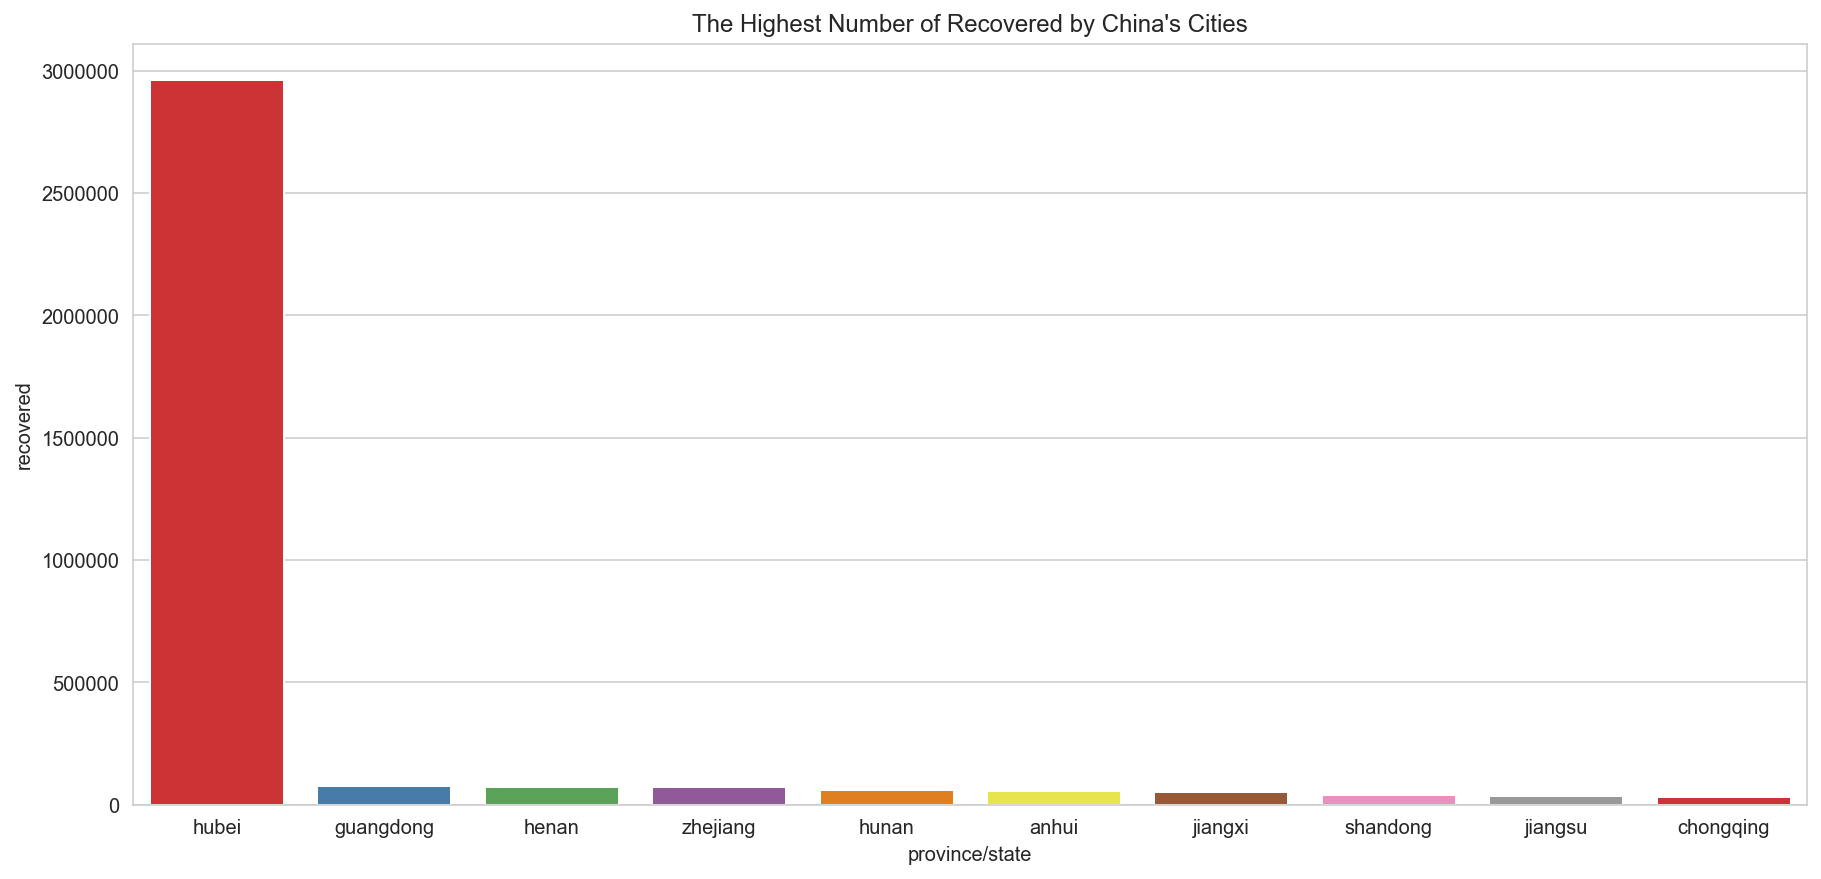

In [46]:
plt.figure(figsize = (15, 7))
plt.title ("The Highest Number of Recovered by China's Cities")
sns.barplot(x = 'province/state', y = 'recovered', data = recovered_groupby.head(10), palette = 'Set1')
plt.show()

In [47]:
#without china
no_china_recovered_groupby = no_china_full_groupby[['country', 'recovered']]
no_china_recovered_groupby= no_china_recovered_groupby.sort_values(by='recovered', ascending=False)
no_china_recovered_groupby = no_china_recovered_groupby.reset_index(drop=True)
no_china_recovered_groupby.head(10).style.background_gradient(cmap='nipy_spectral_r')

,country,recovered
0,spain,968813
1,germany,889371
2,iran,747325
3,italy,636348
4,us,519050
5,france,436075
6,switzerland,181883
7,south korea,171426
8,belgium,95775
9,austria,92275


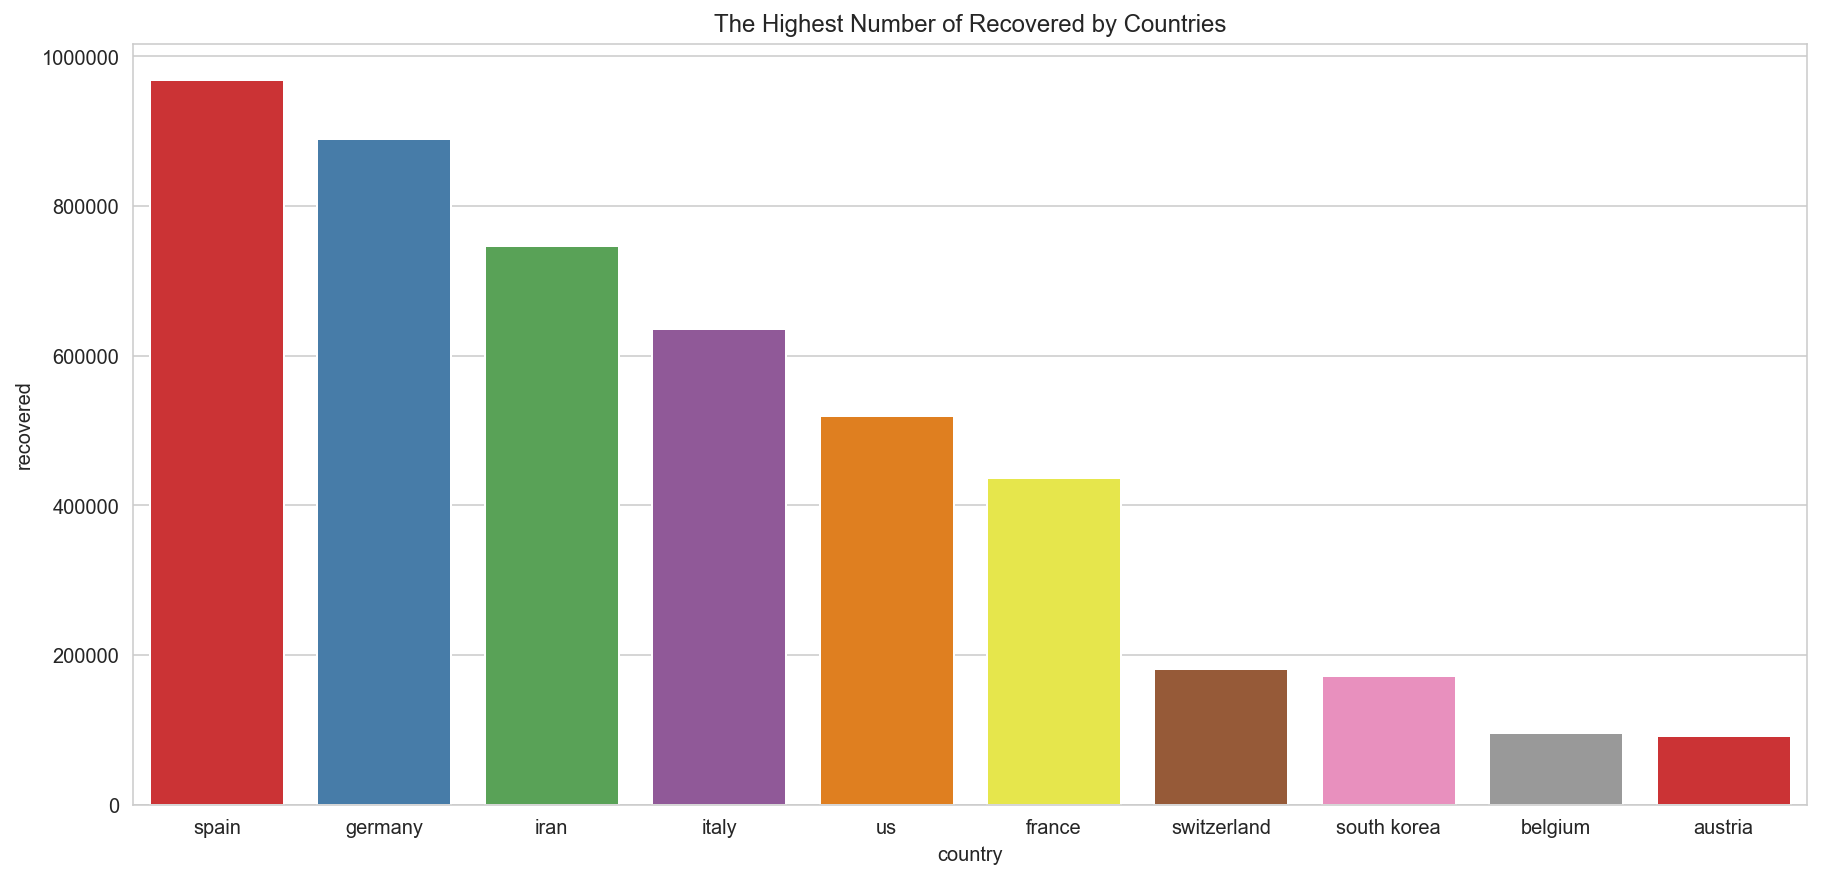

In [48]:
plt.figure(figsize = (15, 7))
plt.title ('The Highest Number of Recovered by Countries')
sns.barplot(x = 'country', y = 'recovered', data = no_china_recovered_groupby.head(10), palette = 'Set1')
plt.show()

- ### Visualization by Month

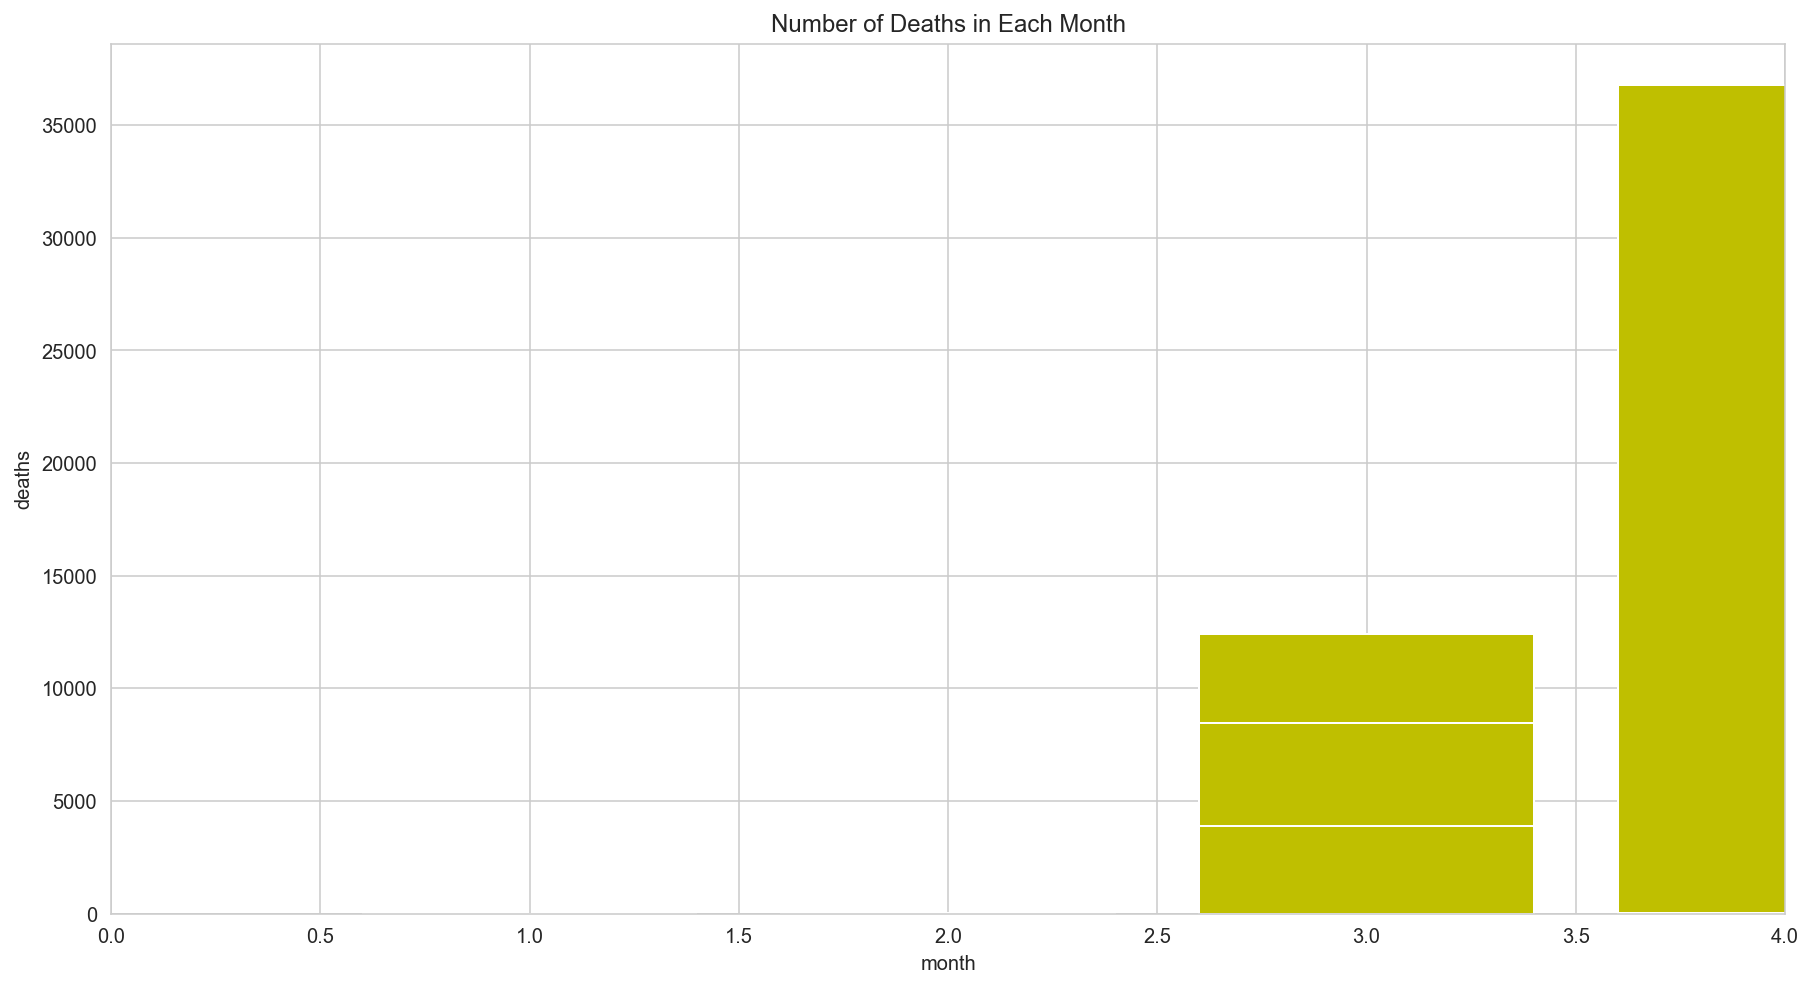

In [74]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.bar(no_china.month, no_china.deaths, alpha=1, color= 'y',)
ax.set(xlim=(0, 4))
plt.xlabel('month')
plt.ylabel('deaths')
plt.title('Number of Deaths in Each Month') 
plt.show ()

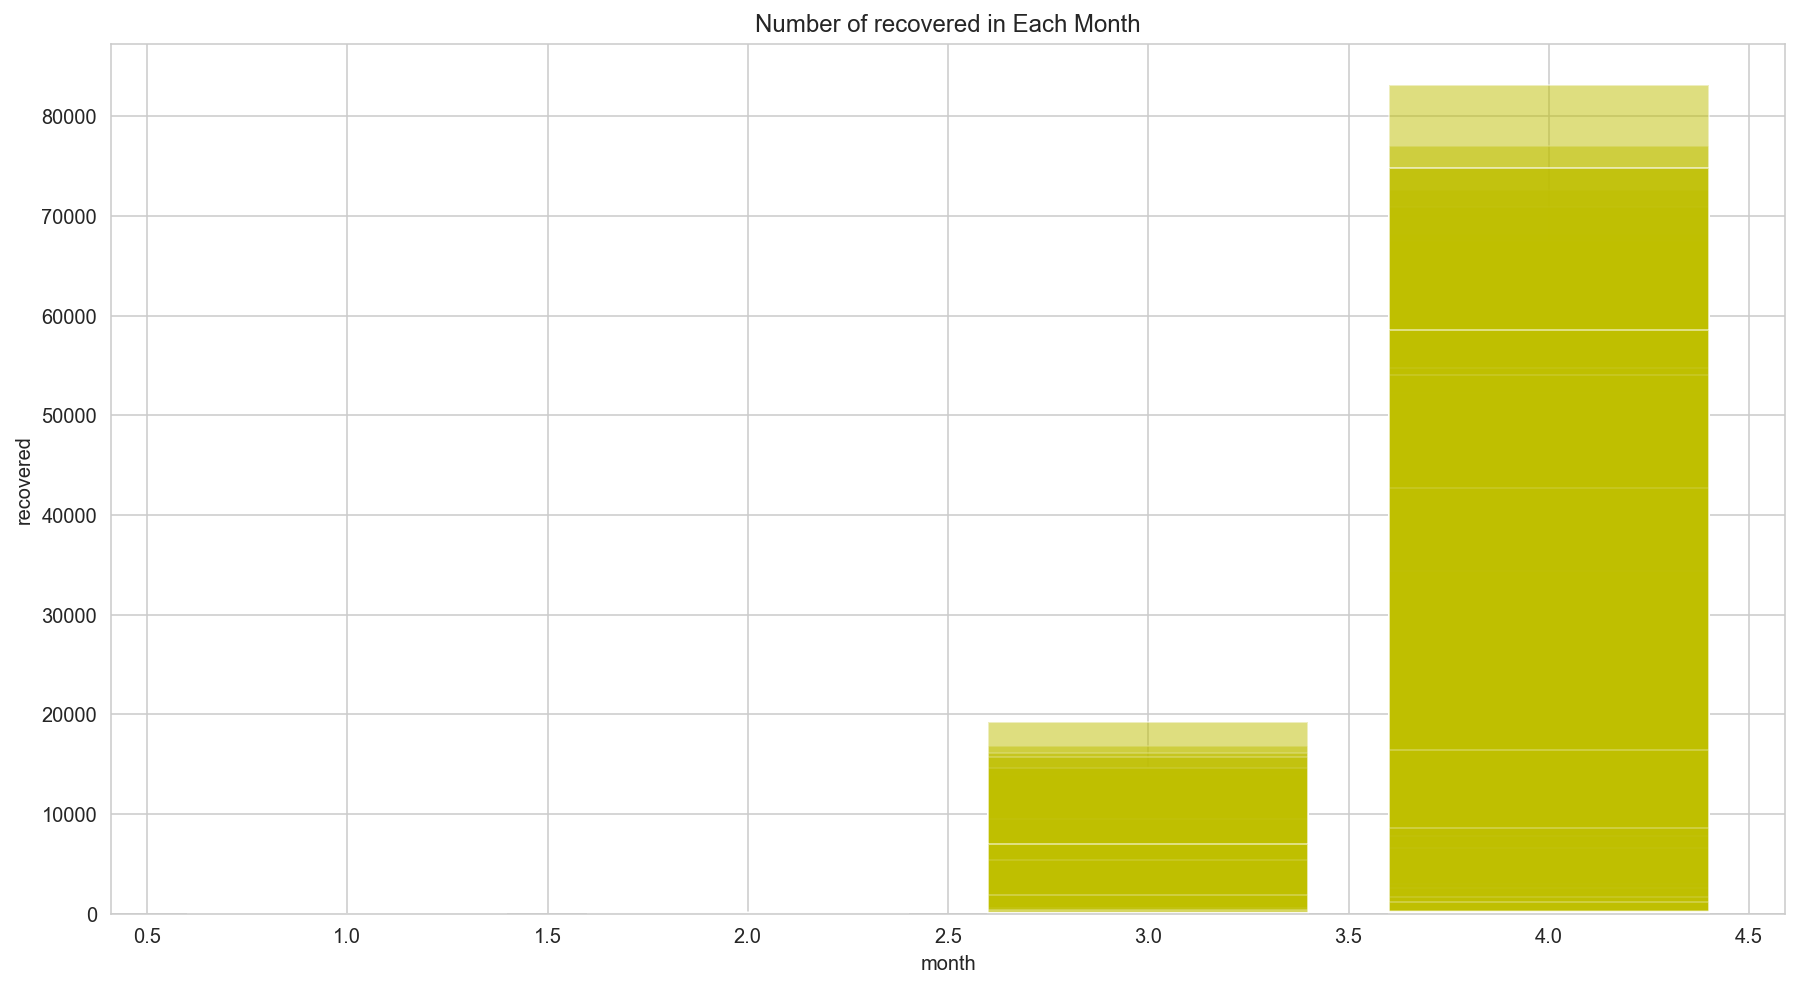

In [72]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.bar(no_china.month,no_china.recovered, alpha=0.5, color= 'y',)
plt.xlabel('month')
plt.ylabel('recovered')
plt.title('Number of recovered in Each Month')
plt.show()

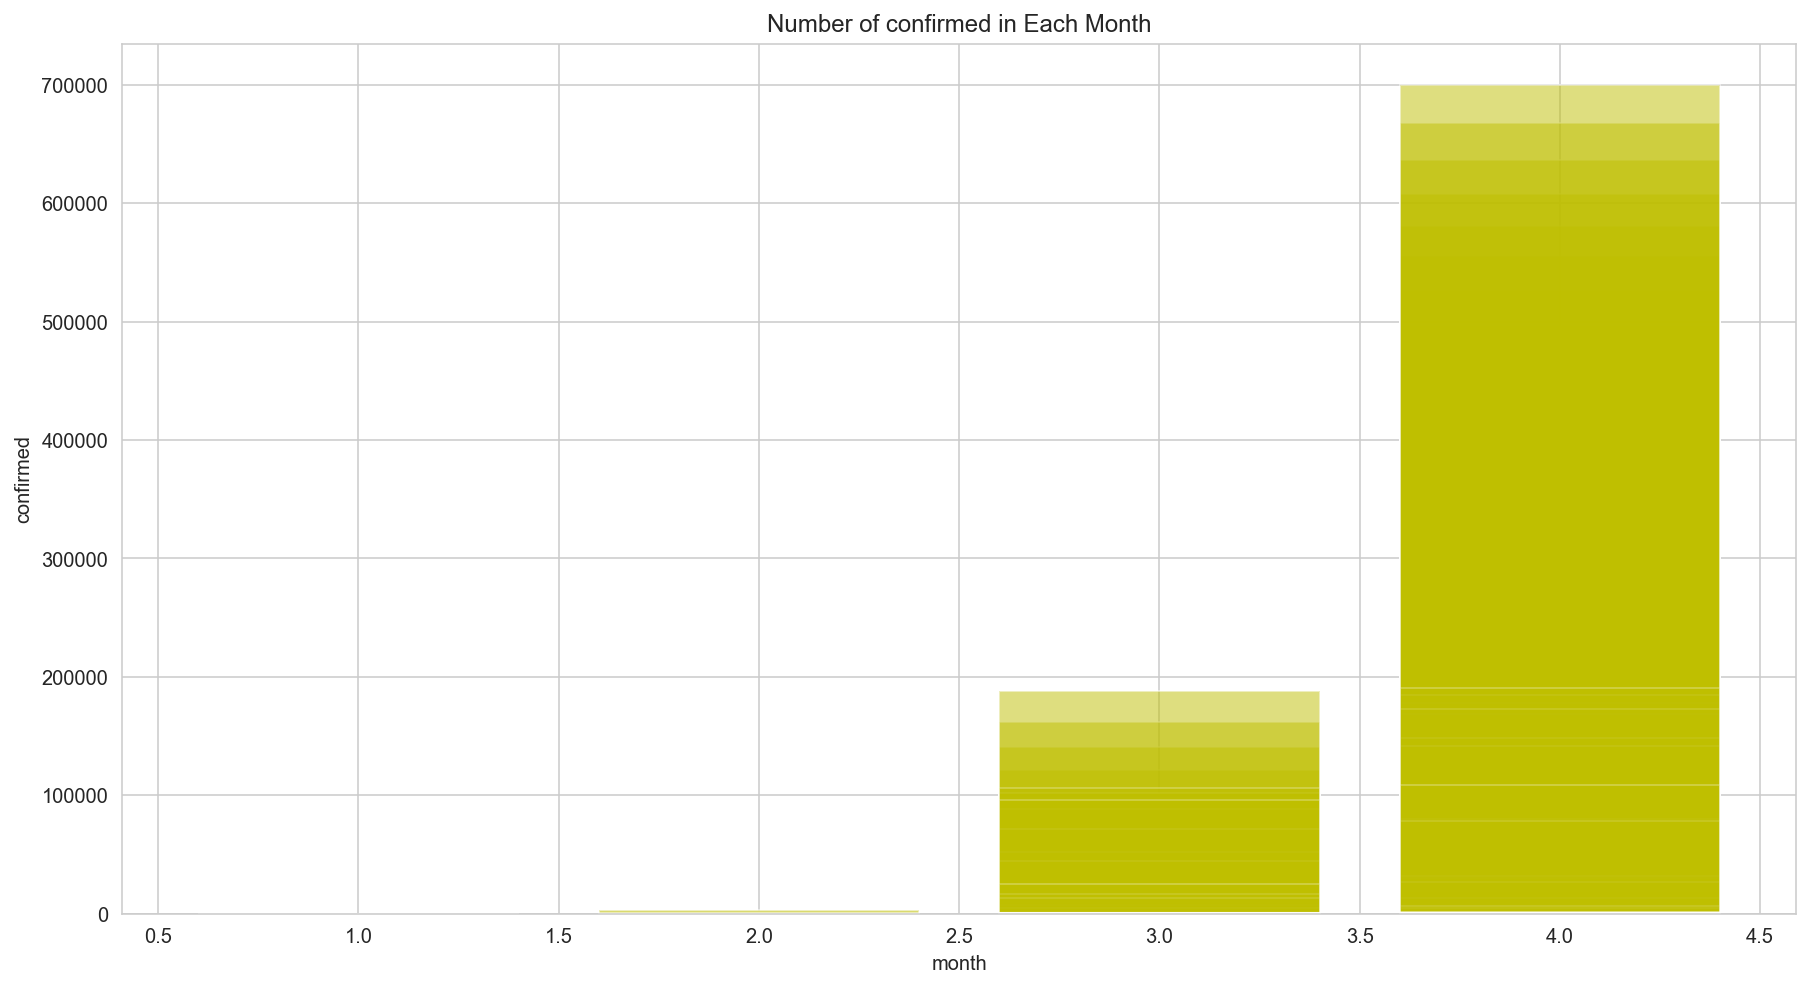

In [73]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.bar(no_china.month,no_china.confirmed, alpha=0.5, color= 'y',)
plt.xlabel('month')
plt.ylabel('confirmed')
plt.title('Number of confirmed in Each Month')
plt.show ()